In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter

In [2]:
%matplotlib inline

# Import and Clean Dataset about Blog Articles

In [3]:
# Import the dataset
blog = pd.read_csv('BagnoudAlexandre3.csv')

In [4]:
# Clean the Tags column
blog['Tags'] = blog['Tags'].map(lambda x: x.lstrip('Tags:,\n\t\t\t\t\t\t\t,'))
blog['Tags'] = blog['Tags'].map(lambda x: x.replace(',, ,', ', '))

In [5]:
# Clean the Author column
blog['Author'] = blog['Author'].map(lambda x: x.lstrip('Autor:,\n\t\t\t\t\t\t,'))
blog['Author'].replace('ne Grüttner', 'Arne Grüttner', inplace=True)

In [6]:
# Clean the Text and Text2 columns and merge them
blog['Text'] = blog['Text2'].astype(str) + ' ' + blog['Text'].astype(str)
blog['Text'] = blog['Text'].map(lambda x: x.lstrip('nan '))
blog.drop('Text2', inplace=True, axis=1)

In [7]:
# Clean the URL column to keep the publication date only, and change the type of the column to datetime
blog['URL'] = blog['URL'].map(lambda x: x.lstrip('https://aback-blog.iwi.unisg.ch/'))
blog['URL'] = blog['URL'].map(lambda x: x[:10])
blog.rename(columns={'URL':'Publication_Date'}, inplace=True)
blog['Publication_Date'] = pd.to_datetime(blog['Publication_Date'])

In [8]:
blog.head()

,Category,Title,Text,Tags,Author,Publication_Date
0,Agile Innovation,Vision Videos – ein Medium für eine geteilte P...,Die Basis einer erfolgreichen Zusammenarbeit i...,"Agile Innovation, Digital",Lena-Marie Paetzmann,2021-02-18
1,Agile Innovation,Erfolgsfaktoren für digitale Solutions: Wie st...,"Im Rahmen ihrer Masterarbeit, hat Julia Lötsch...","Agile Innovation, Digital, Future of Work, Leh...",Lena-Marie Paetzmann,2020-10-14
2,Agile Innovation,"Zwanzig Aspekte von Innovationskultur, um digi...",In Gesprächen mit unseren Praxispartnern hören...,"Agile Innovation, Digital, Lehrstuhlnachrichten",Christian Marheine,2020-06-15
3,Agile Innovation,Teil 5/5 [Lernkultur]: Raum für neue Lernkultu...,"In einem Interview für die Plattform “,Learnin...","Agile Innovation, Future of Work, Learning Inn...",Lena-Marie Paetzmann,2020-05-17
4,Agile Innovation,Swissteach AG gemeinsam mit CULTURE CONTACT au...,"Sponsored Post., Die ,Swissteach AG, hat ihr P...","Agile Innovation, Artificial Intelligence, Dig...",Lena-Marie Paetzmann,2020-05-17


# Basic Visualisations of Dataset on Blog Articles

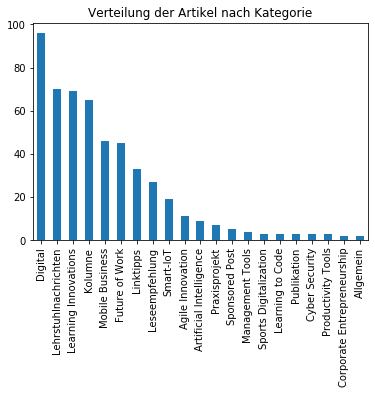

In [9]:
blog['Category'].value_counts().plot.bar(title='Verteilung der Artikel nach Kategorie')

Wir sehen, dass die Kategorie "Digital" die grösste Anzahl Artikel beinhaltet. Es wurde hingegen sehr wenig über Corporate Entrepreneurship geschrieben.

In [10]:
# Create a list of the unique blog articles, since there are duplicates in the original list (due to several tags per article)
blog_unique = blog.drop_duplicates(['Text'], keep='first')

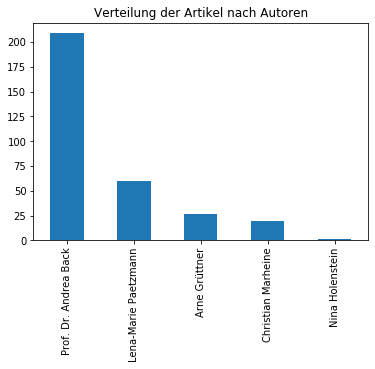

In [11]:
blog_unique['Author'].value_counts().plot.bar(title='Verteilung der Artikel nach Autoren', )

In [12]:
blog_unique['Author'].value_counts()

Prof. Dr. Andrea Back    209
Lena-Marie Paetzmann      60
Arne Grüttner             27
Christian Marheine        19
Nina Holenstein            1
Name: Author, dtype: int64

Wir sehen, dass Prof. Dr. Andrea Back mit Abstand die Mehrheit der Artikel geschrieben hat (209 insgesamt).

# Import and Clean Dataset about Twitter Posts

In [13]:
# Import Twitter Dataset
twitter = pd.read_json('BagnoudAlexandre3.json', lines = True)

In [14]:
# Remove the columns that are not relevant for us
twitter.drop(['id', 'conversation_id', 'timezone', 'user_id', 'username', 'name', 'place'], axis=1, inplace=True)
twitter.drop(['geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace=True)

In [15]:
# Clean the column on the urls shared to extract data from the strings later
twitter['urls'] = twitter['urls'].astype(str)
twitter['urls'] = twitter['urls'].map(lambda x: x.lstrip('['))
twitter['urls'] = twitter['urls'].map(lambda x: x.rstrip(']'))

# Analysis of Datasets

In [16]:
# Create DateFrame with only the Twitter Posts that are relevant, i.e. the ones in which a link about the blog has been shared
twitter_shared_link = twitter[twitter['urls'].str.contains("https://aback-blog.iwi.unisg.ch", na=False)]

In [17]:
# How many times a link about the blog has been shared on Twitter
len(twitter_shared_link)

43

In [18]:
# How many unique blog articles there are
len(blog_unique)

316

Prof. Dr. Andrea Back hat nur 43 mal einen Link zu ihrem Blog auf Twitter geteilt, also viel weniger als die 304  Artikel auf ihrem Blog (oder die 209 Artikel, die sie selber geschrieben hat). Daraus kann man schliessen, dass sie nur ausgewählte Artikel auf Twitter teilt.

## Analysis of Article Publications' / Twitter Posts' dates

In [19]:
publication_distribution = pd.DataFrame(blog_unique['Publication_Date'].value_counts().sort_index())

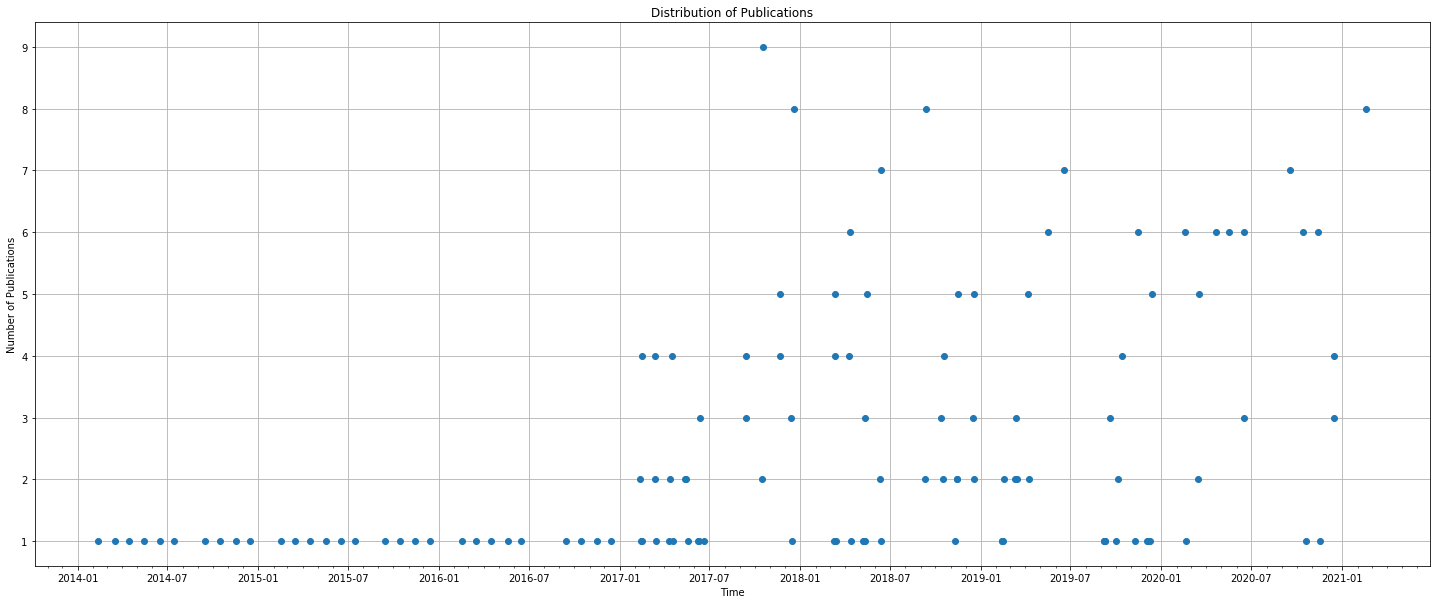

In [20]:
fig, graph = plt.subplots(figsize=(25, 10))

graph.set_xlabel('Time')
graph.set_ylabel('Number of Publications')
graph.set_title('Distribution of Publications')
graph.grid(True)

graph.xaxis.set_major_locator(MonthLocator(interval=6))
graph.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
graph.xaxis.set_minor_locator(MonthLocator())

graph.plot(publication_distribution.index, publication_distribution, color='tab:blue', label='Blog Publication',
        linestyle='None', marker='o', ms=6)

Diese Grafik zeigt wie viele Artikel wann publiziert wurden.

Zwischen 2014 und 2017 hat Prof. Dr. Back max. 1 Blog-Artikel pro Monat geschrieben. Ab 2017 hat sie dies viel häufiger gemacht.

Wir sehen auch, dass sie oft mehrere Blog-Artikel am gleichen Tag publiziert - sogar bis zu 9 Artikeln am gleichen Tag! 

In [21]:
blog_unique["Publication_year"] = blog_unique["Publication_Date"].dt.year
blog_unique["Publication_month"] = blog_unique["Publication_Date"].dt.month
blog_unique["Publication_day"] = blog_unique["Publication_Date"].dt.day

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

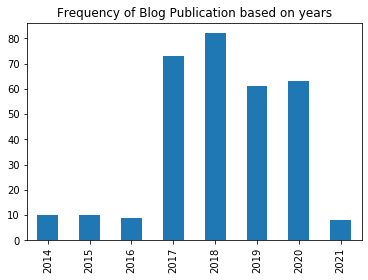

In [22]:
blog_unique['Publication_year'].value_counts().sort_index().plot.bar(title = 'Frequency of Blog Publication based on years')

Frau Prof. Dr. Back hat ab dem Jahr 2017 viel mehr Blog-Artikel publiziert.

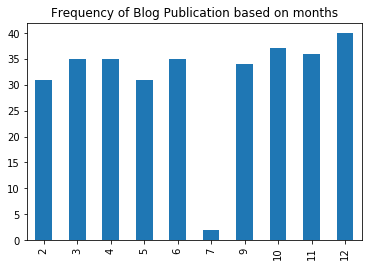

In [23]:
blog_unique['Publication_month'].value_counts().sort_index().plot.bar(title = 'Frequency of Blog Publication based on months')

Man kann beobachten, dass es NIE Blog-Artikel im Januar und August publiziert werden. Sie werden auch sehr selten im Juli publiziert.

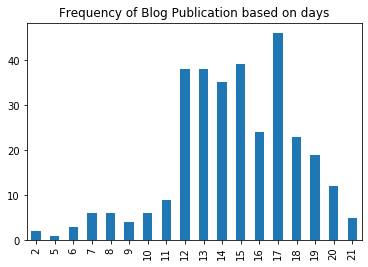

In [24]:
blog_unique['Publication_day'].value_counts().sort_index().plot.bar(title='Frequency of Blog Publication based on days')

Es ist interessant zu sehen, dass die Mehrheit der Blog-Artikel zwischen dem 12. und dem 20. vom Monat publiziert werden. Es wurde noch nie Artikel nach dem 21. eines Monats publiziert.

**Fazit:** Man sollte den Blog zwischen Februar - Juni und September - Dezember besuchen, und eher zwischen dem 12. und 20. vom Monat. Da ist die Wahrscheinlichkeit am höchsten, dass wir neue Blog Artikel finden werden.

In [25]:
twitter_shared_link_dist = pd.DataFrame(twitter_shared_link['date'].value_counts().sort_index())

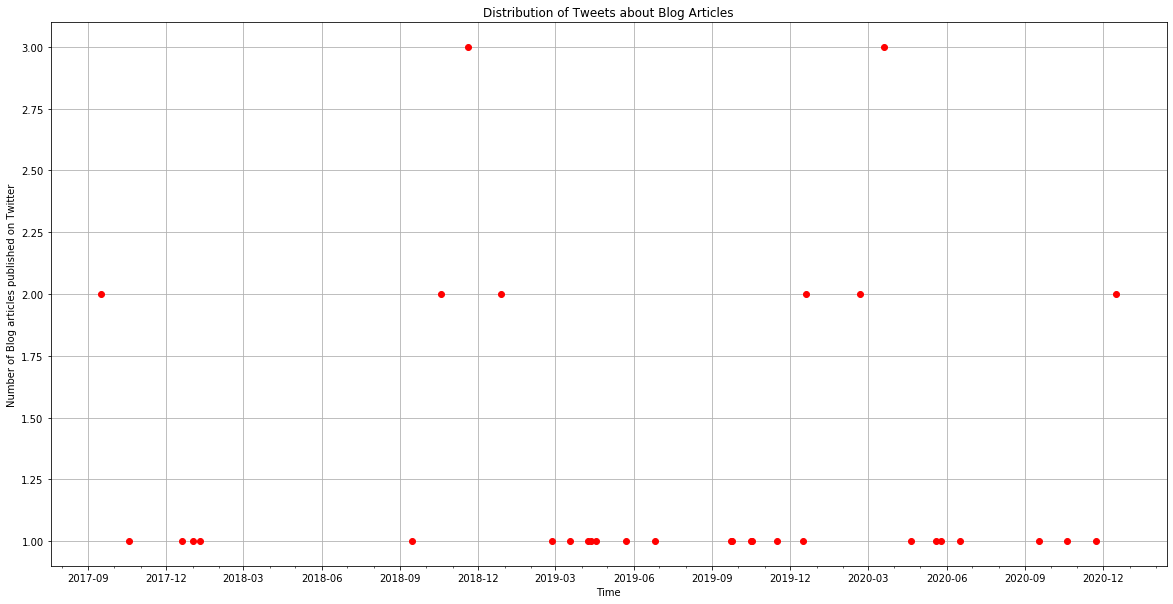

In [26]:
fig, graph = plt.subplots(figsize=(20, 10))

graph.set_xlabel('Time')
graph.set_ylabel('Number of Blog articles published on Twitter')
graph.set_title('Distribution of Tweets about Blog Articles')
graph.grid(True)

graph.xaxis.set_major_locator(MonthLocator(interval=3))
graph.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
graph.xaxis.set_minor_locator(MonthLocator())

graph.plot(twitter_shared_link_dist.index, twitter_shared_link_dist, color='red', label='Twitter-Post',
        linestyle='None', marker='o')

Frau Prof. Dr. Back hat den ersten Link zu ihrem Blog im September 2017 auf Twitter gepostet, also im gleichen Jahr wo sie angefangen hat, mehr Artikel auf ihrem Blog zu publizieren.

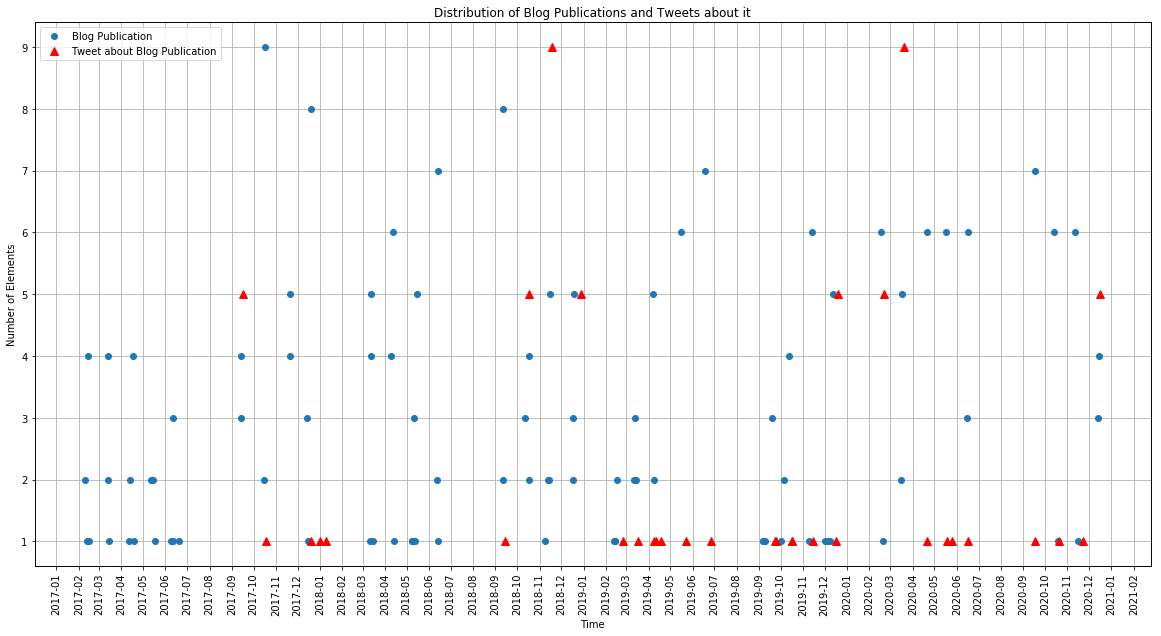

In [27]:
fig, graph = plt.subplots(figsize=(20, 10))
graph_b = graph.twinx()

graph.set_xlabel('Time')
graph.set_ylabel('Number of Elements')
graph.set_title('Distribution of Blog Publications and Tweets about it')
graph.grid(True)

graph.plot(publication_distribution['2017-01-01':'2020-12-31'].index, publication_distribution['2017-01-01':'2020-12-31'], color='tab:blue', label='Blog Publication',
        linestyle='None', marker='o')

graph_b.plot(twitter_shared_link_dist.index, twitter_shared_link_dist, color='red', label='Tweet about Blog Publication',
        linestyle='None', marker='^', ms=8.0)

graph.xaxis.set_major_locator(MonthLocator())
graph_b.axes.get_yaxis().set_visible(False)

plt.setp(graph.get_xticklabels(), rotation=90, )

mylines, mylabels = graph.get_legend_handles_labels()
mylines_b, mylabels_b = graph_b.get_legend_handles_labels()
graph.legend(mylines + mylines_b, mylabels + mylabels_b, loc='upper left')


Auf dieser Grafik kann man folgendes sehen:
- Frau Prof. Dr. Back postet nicht alle Blog-Artikel auf Twitter
- Frau Prof. Dr. Back postet in der Regel den Link auf Twitter nicht am gleichen Tag wo sie den Artikel auf dem Blog publiziert. Sie wartet ein paar Tage.

Diese Grafik ist aber noch etwas unübersichtlich. Wir sollen nun genauer untersuchen, wie viele Tage Frau Prof. Dr. Back wartet, bevor sie den Link eines Blog-Artikls auf Twitter postet.

In [28]:
joint_distribution = pd.concat([publication_distribution['2017-01-09':'2020-12-31'], twitter_shared_link_dist], axis=1)

In [29]:
joint_distribution.rename(columns={'Publication_Date':'Blog_Publication', 'date':'Twitter_Publication'}, inplace=True)

In [30]:
# Wir schauen hier ob gewisse Tweets über den Blog am gleichen Tag gepostet wurden, als ein Blog-Artikel geschrieben wurde.
joint_distribution.dropna()

,Blog_Publication,Twitter_Publication
2017-12-19,8.0,1.0
2018-10-18,4.0,2.0
2019-04-08,2.0,1.0
2020-04-20,6.0,1.0
2020-09-17,7.0,1.0


Dies bestätigt unsere Vermutung aus der obenen Grafik: Frau Prof. Dr. Back teilt selten einen Link auf Twitter am gleichen Tag wo sie einen Artikel auf ihrem Blog publiziert hat. Es ist nur 5-mal passiert zwischen September 2017 und Dezember 2020, und wir sind noch nicht sicher, ob es sich bei der Blog-Publikation und bei dem Tweet um den gleichen Blog-Artikel gehandelt hat.

In [31]:
#Extract the date of the blog article from the urls shared in a Tweet
r = twitter_shared_link.urls.str.extractall("(\d\d\d\d/\d\d/\d\d)").unstack()
r.columns = r.columns.droplevel(0)
twitter_shared_link = twitter_shared_link.join(r)

In [32]:
# Clean the column from the new data extracted in the cell above
twitter_shared_link.rename(columns={0:'blog_article_date'}, inplace=True)
twitter_shared_link = twitter_shared_link[twitter_shared_link['blog_article_date'].notna()]
twitter_shared_link.drop(1, inplace=True, axis=1)

# Change data type to datetime
twitter_shared_link['blog_article_date'] = pd.to_datetime(twitter_shared_link['blog_article_date'])

# Calculate the number of days that pass between a publication on a blog and a tweet about this same article
twitter_shared_link['blog_to_twitter_days'] = twitter_shared_link['date'] - twitter_shared_link['blog_article_date']

In [33]:
# Create a new dataframe for the time lapse between blog publication and tweet about it
time_to_twitter = pd.DataFrame(twitter_shared_link['blog_to_twitter_days'].value_counts().sort_index())
time_to_twitter.rename(columns={'blog_to_twitter_days':'absolute_frequency'}, inplace=True)

# Calculate frequencies so that we can create a plot
time_to_twitter['cumulative_frequency'] = time_to_twitter['absolute_frequency'].cumsum()
time_to_twitter['relative_cumulative_frequency'] = time_to_twitter['cumulative_frequency'] / len(twitter_shared_link)

In [34]:
# Clean the index of the dataframe so that it comes nice when we plot it
time_to_twitter.index = time_to_twitter.index.map(str)
as_list = time_to_twitter.index.tolist()
time_to_twitter.index = [x[:-9] for x in as_list]

In [35]:
# Visualise the Dataframe: how many days pass before Mrs. Prof. Dr. Back tweets about a newly published blog article?
time_to_twitter

,absolute_frequency,cumulative_frequency,relative_cumulative_frequency
0 days,4,4,0.095238
1 days,3,7,0.166667
2 days,6,13,0.309524
3 days,3,16,0.380952
4 days,5,21,0.500000
5 days,4,25,0.595238
6 days,3,28,0.666667
7 days,2,30,0.714286
8 days,2,32,0.761905
10 days,1,33,0.785714


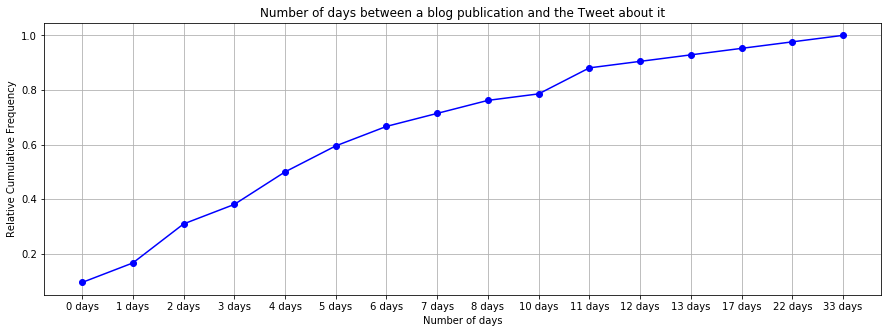

In [36]:
fig, graph = plt.subplots(figsize=(15, 5))

graph.set_xlabel('Number of days')
graph.set_ylabel('Relative Cumulative Frequency')
graph.set_title('Number of days between a blog publication and the Tweet about it')
graph.grid(True)

graph.plot(time_to_twitter.index, time_to_twitter['relative_cumulative_frequency'], color='blue', marker='o')

Mit dieser Grafik sieht man, dass wenn Frau Prof. Dr. Back einen Blog-Artikel auf Twitter teilt, macht sie es in 50% der Fälle innerhalb von max. 4 Tagen nachdem der Artikel auf dem Blog publiziert wurde. In knapp 80% der Fälle erfolgt dies innerhalb von max. 10 Tage. Es ist hingegen sehr selten, dass sie den Blog-Artikel am Tag der Publikation auf Twitter teilt (weniger als 10% der Fälle).